### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="Fig1 The Combined E commerce Dataset.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
# your code and solutions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Display the DataFrame
ds1 = pd.read_csv("The E-commerce Dataset.csv")
ds1

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [2]:
#counting number of Null values in each column
data= ds1[ds1.review == 'none']
print(f"The number of 'none' value in review is {len(data)}")
print(f"The result of number of Null values in each column \n{ds1.isnull().sum()}")


The number of 'none' value in review is 18
The result of number of Null values in each column 
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


In [3]:
#print the length of the data before and after removing the missing data.
ds_remove= ds1.dropna(axis=0)
ds_remove1 = ds_remove[ds_remove.review != 'none']
print(f"Before removing the missing data is {len(ds1)}")
print(f"After removing the missing data is {len(ds_remove1)}")

Before removing the missing data is 20000
After removing the missing data is 19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [6]:
# your code and solutions
#Q2.1 total number of unique users, unique reviews, unique items, and unique categories
ds_uni= ds_remove1[['review', 'userId', 'item', 'category']]
ds_uni1=ds_uni.nunique()
print(ds_uni1)


review      19459
userId       8562
item           89
category        9
dtype: int64


In [7]:
#Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

ds_remove1['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [52]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
gender_item_counts = ds_remove1.groupby('gender')['item'].count()
gender_item_counts.describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64

In [9]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
item_rating = ds_remove1.groupby('item')['rating'].count() 
item_rating.describe()

#item_rating

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: rating, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

Text(0.5, 1.0, 'Helpfulness by gender')

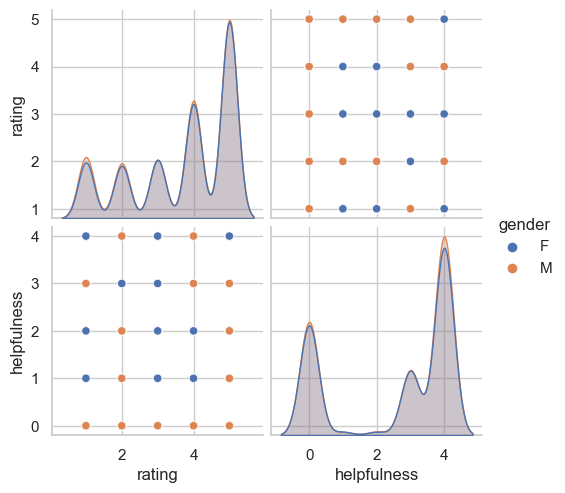

<Figure size 500x3000 with 0 Axes>

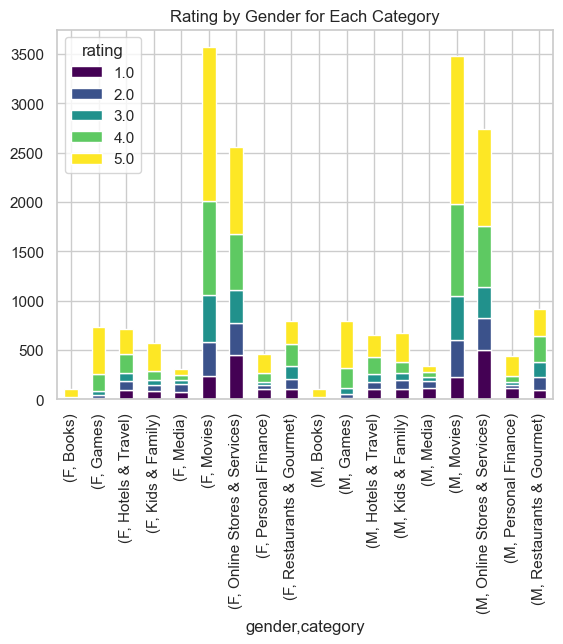

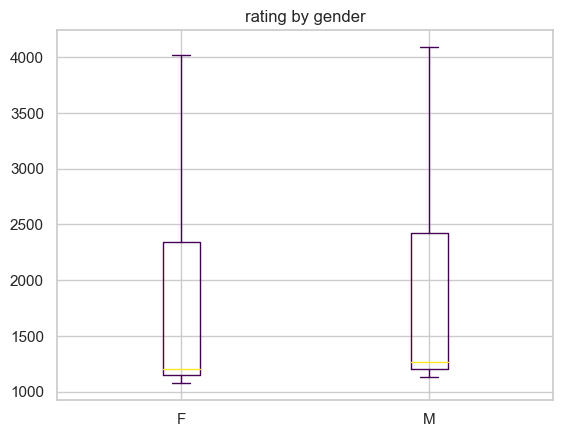

<Figure size 500x300 with 0 Axes>

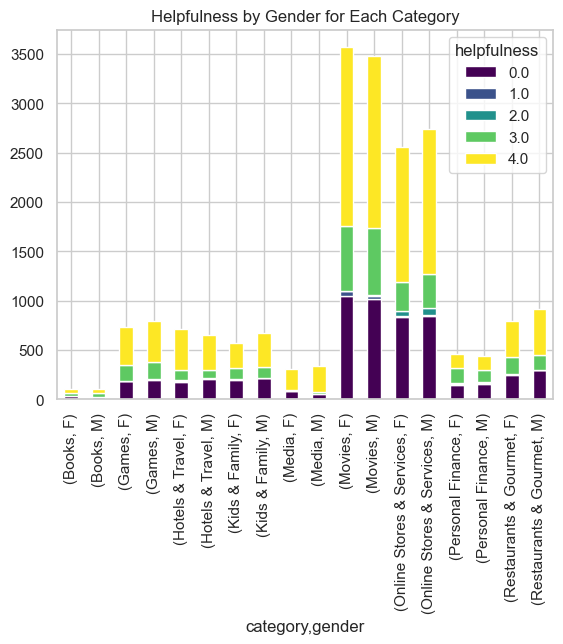

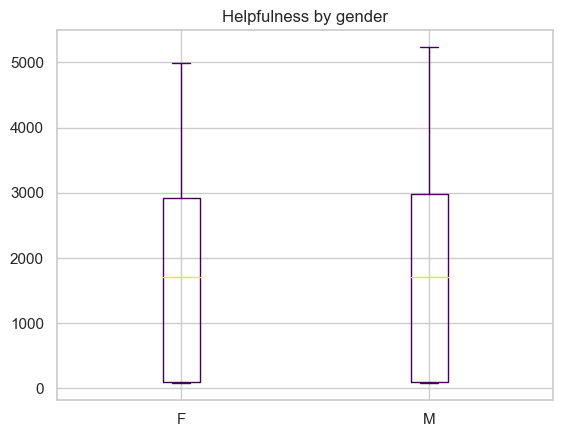

In [82]:
# your code and solutions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

#type of relationship showing
#gender compare with rating

g = sns.pairplot(ds_remove1, hue="gender", vars =['rating','helpfulness'])

rating_gender = ds_remove1.groupby(['gender', 'category','rating']).size().unstack(fill_value=0)
plt.figure(figsize=(5, 30))
rating_gender.plot(kind='bar', stacked=True, cmap='viridis')
plt.title("Rating by Gender for Each Category")
rating_gender_box = ds_remove1.groupby([ 'rating','gender']).size().unstack(fill_value=0)
rating_gender_box.plot(kind='box', stacked=True, cmap='viridis')
plt.title("rating by gender")

#gender compare with helpfulness
helpfulness_gender = ds_remove1.groupby(['category','gender', 'helpfulness']).size().unstack(fill_value=0)
plt.figure(figsize=(5, 3))
helpfulness_gender.plot(kind='bar', stacked=True, cmap='viridis')
plt.title("Helpfulness by Gender for Each Category")
helpfulness_gender_box = ds_remove1.groupby([ 'helpfulness','gender']).size().unstack(fill_value=0)
helpfulness_gender_box.plot(kind='box', stacked=True, cmap='viridis')
plt.title("Helpfulness by gender")

Text(0.5, 1.0, 'Rating by Each Category')

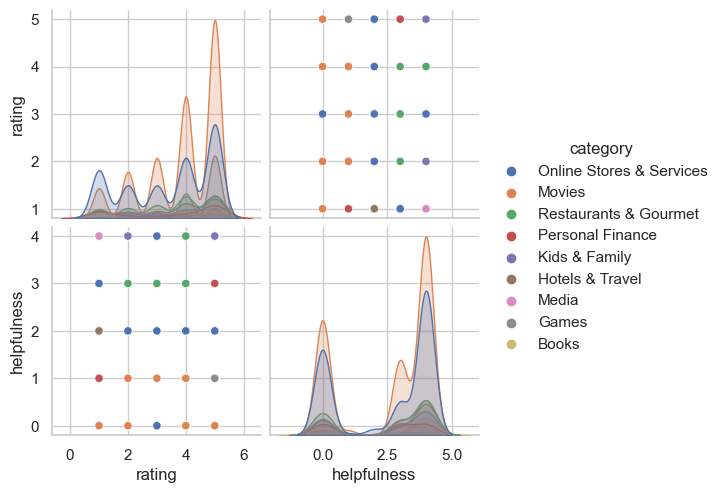

<Figure size 2000x600 with 0 Axes>

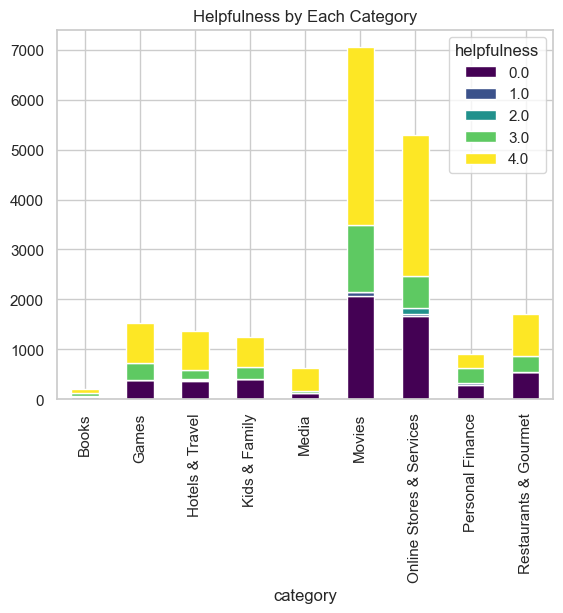

<Figure size 2000x600 with 0 Axes>

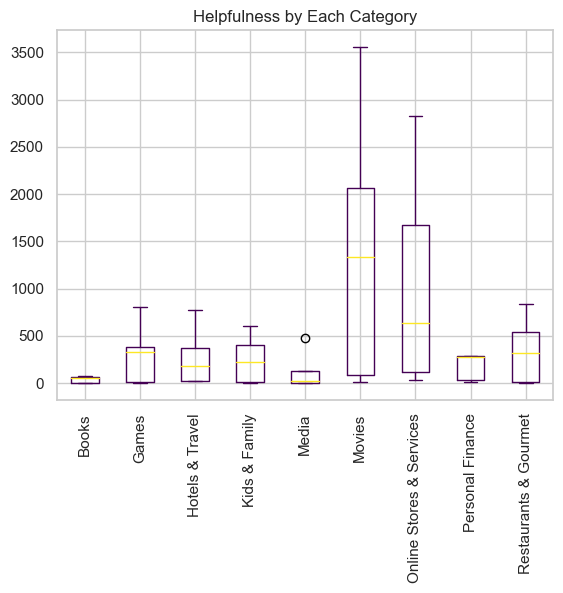

<Figure size 2000x600 with 0 Axes>

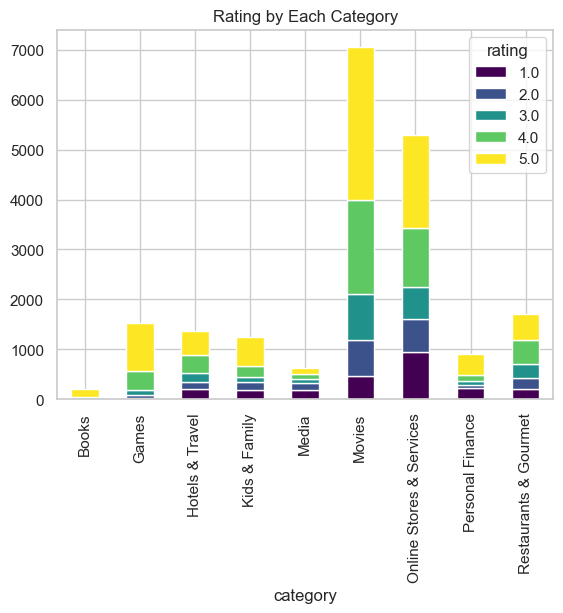

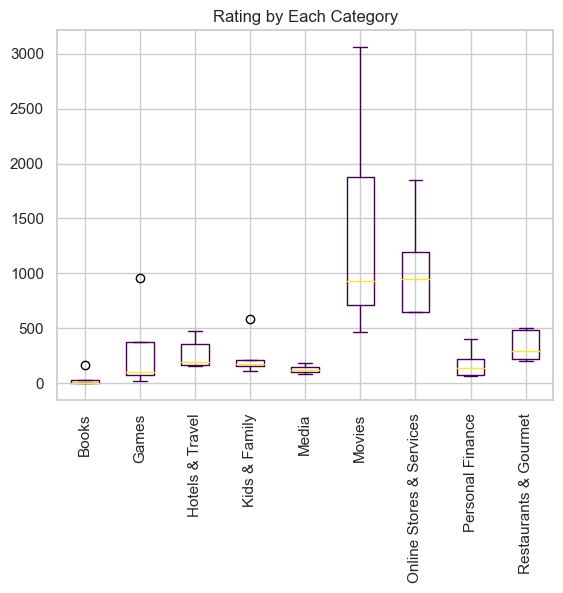

In [81]:
# #category compare with helpfulness
g1 = sns.pairplot(ds_remove1, hue="category", vars =['rating','helpfulness'])

helpfulness_category_box = ds_remove1.groupby(['helpfulness', 'category']).size().unstack(fill_value=0)
helpfulness_category = ds_remove1.groupby([ 'category','helpfulness']).size().unstack(fill_value=0)
plt.figure(figsize=(20, 6))
helpfulness_category.plot(kind='bar', stacked=True, cmap='viridis')
plt.title("Helpfulness by Each Category")
plt.figure(figsize=(20,6))
helpfulness_category_box.plot(kind='box', stacked=True, cmap='viridis')
plt.xticks(rotation='vertical')
plt.title("Helpfulness by Each Category")

 #category compare with rating
rating_category_box = ds_remove1.groupby([ 'rating','category']).size().unstack(fill_value=0)
rating_category = ds_remove1.groupby(['category', 'rating']).size().unstack(fill_value=0)
plt.figure(figsize=(20, 6))
rating_category.plot(kind='bar', stacked=True, cmap='viridis')
plt.title("Rating by Each Category")
rating_category_box.plot(kind='box', stacked=True, cmap='viridis')
plt.xticks(rotation='vertical') 
plt.title("Rating by Each Category")

/var/folders/l8/q9x6py293ksbsvl_xmlykyz00000gn/T/ipykernel_59542/3627352615.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ds_remove1.corr()


<Axes: >

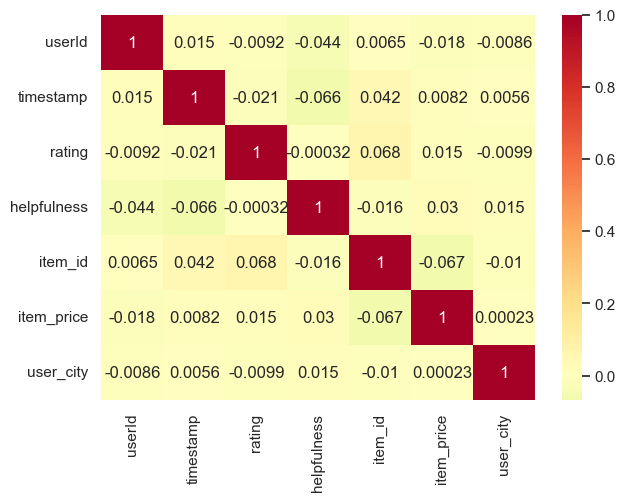

In [44]:
correlation_matrix = ds_remove1.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap= 'RdYlGn_r', center=0) 

1. Between gender and rating, helpfulness: The difference of rating is very small, but overall, it appears that males tend to score higher. Looking at the box plots, the median of male is higher than female's, and the outliers of males in the distribution also have higher value. Similarly, difference with helpfulness although it's small , it seems that males give higher scores than females. The medians in the box plots appear similar, but the outliers of males are higher, and the third quartile of males is higher.
2. Between category and rating, helpfulness: In the comparison between "helpfulness" and "category," the median value of movies is the highest, and its values are generally distributed at higher levels than others. Additionally, the outlier pf Movie has the highest values. The smallest median value belongs to "media," and the distribution of values is the narrowest for the "books" category.
On the other hand, in the comparison between "rating" and "category," the outlier of movies is the highest. However, the median value for "Online Stores & Services" is higher. The smallest median value belongs to the "Books".
3. In the correlation matrix, we recognize the correlation between rating and helpfulmess.If the variable "rating" increases, the "helpfulness" decreases 0.00032. Otherwise, the helpfulness increase, rating can be decrease 0.00032. However, since we need to consider relations with other factors as well, we also need to analyze the correlation with other variables. 

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [83]:
# your code and solutions

#reviews of which the helpfulness is no more than 2
remove_helpfulness= ds_remove1[ds_remove1.helpfulness >2]
print(f"Before the remove the helpfulness is no more than 2 is {len(ds_remove1)} "
      f"after the remove the helpfulness is no more than 2 is {len(remove_helpfulness)}.")

Before the remove the helpfulness is no more than 2 is 19916 after the remove the helpfulness is no more than 2 is 13643.


In [84]:
#users who rate less than 7 items
remove_user = remove_helpfulness[remove_helpfulness.groupby("userId")["rating"].transform('count')>=7 ]
print(f"Before remove the users who rate less than 7 items is {len(remove_helpfulness)} "
      f"after remove users who rate less than 7 items is {len(remove_user)}.")

Before remove the users who rate less than 7 items is 13643 after remove users who rate less than 7 items is 2741.


In [85]:
#items that receives less than 11 ratings
remove_item = remove_user[remove_user.groupby("item_id")["rating"].transform('count') >=11]
#ds_remove1
print(f"Before remove the users who rate less than 7 items is {len(remove_user)} "
      f"after remove users who rate less than 7 items is {len(remove_item)}.")

Before remove the users who rate less than 7 items is 2741 after remove users who rate less than 7 items is 2685.
